# Kapittel 16

N = 10

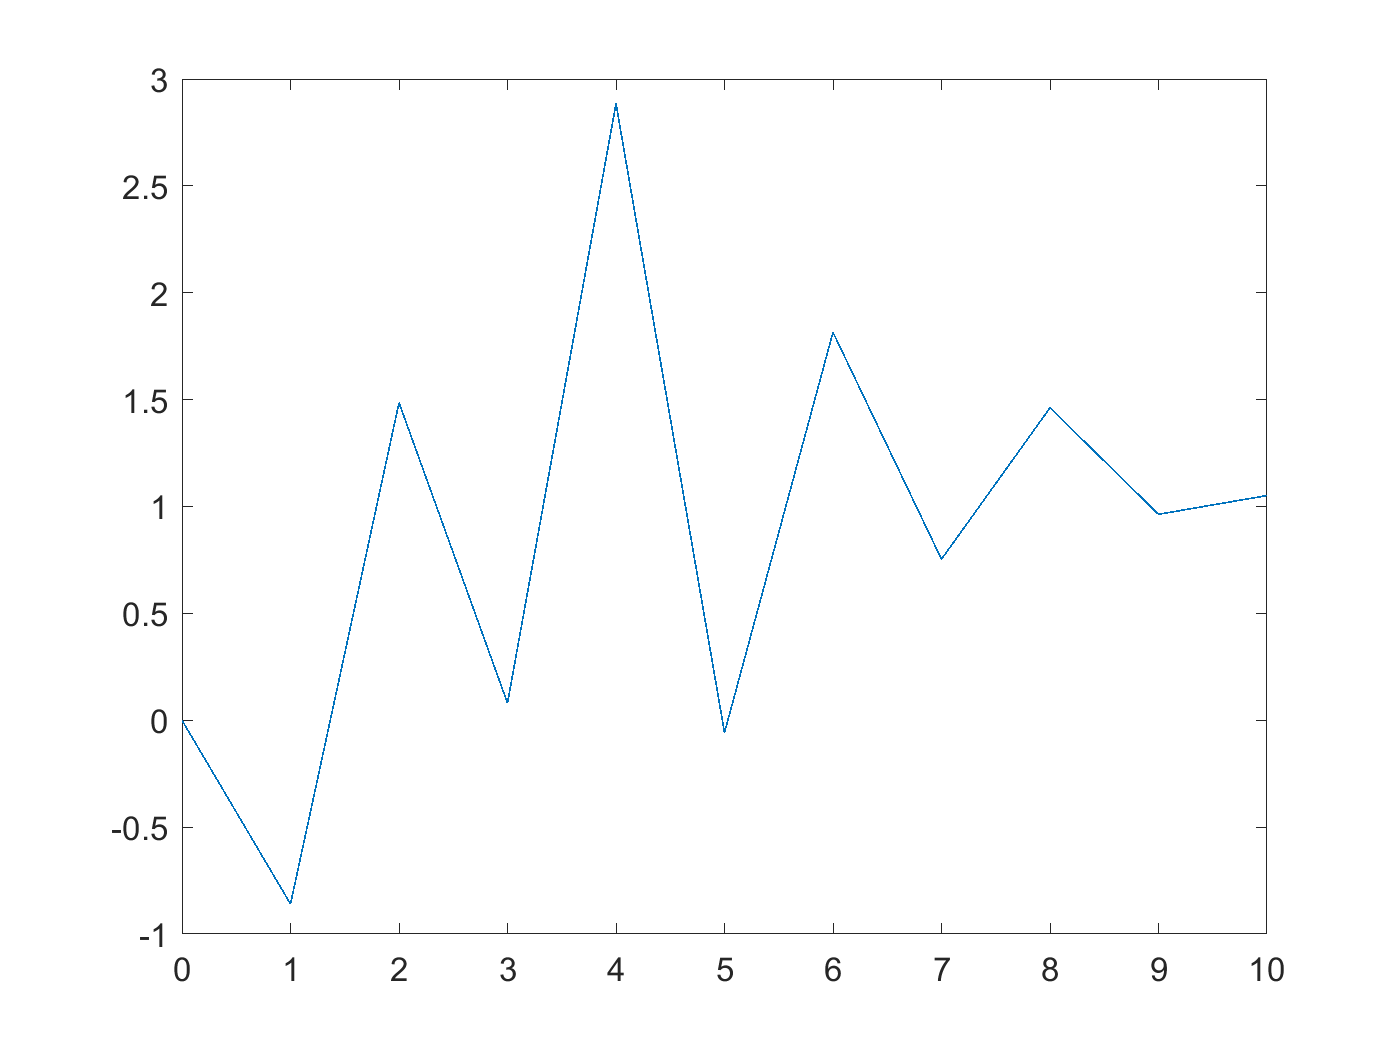

In [3]:
% EndelegDiffOrden1.m

% Skript som løyser startverdiproblemet
% a(x) y' + b(x) y = c(x), y(x_0)=y_0.
% Skriptet brukar endeleg differanse-formlar for
% numeriske deriverte til å sette opp problemet
% som ei matriselikning.
% Input:
%   1) Funksjonane a(x), b(x) og c(x)
%   2) Startkravet, x0 og y0
%   3) Maksimalverdi for x, xF
%   4) Talet på delintervall, N
% Til den siste variabelen brukar vi input-funksjonen.
% Dei andre er hardkoda.

% Inputvariablar
x0=0;
y0=0;
xF=10;
% Gir oppdelinga av x-intervallet
%N=input('Gi talet på delintervall: ');
N = 10

% Funksjonar
a=@(x) log(x+1);
b=@(x) exp(-x);
c=@(x) sin(x.^2/5);

% Vektor med x-verdiar
h=(xF-x0)/N;
xVektor=(x0+h):h:xF;

% Matriser og vektor for funksjonane;
Amat=diag(a(xVektor));
Bmat=diag(b(xVektor));
Cvektor=c(xVektor).';

% Matrise for den deriverte
% Brukar midtpunktsformelen for numerisk derivasjon
D1Mat=zeros(N,N);
for ind=2:(N-1)
  D1Mat(ind,[ind-1 ind+1])=[-1 1]/(2*h);
end
% Derivert i venstre ende
D1Mat(1,2)=1/(2*h);
% Derivert i høgre ende
D1Mat(N,(N-2):N)=[1 -4 3]/(2*h);

% Set opp totalmatrisa
TotMat=[Amat*D1Mat+Bmat, Cvektor];
% Legg til startkravet
TotMat(1,N+1)=TotMat(1,N+1)+a(x0+h)*y0/(2*h);

% Løyser likningssystemet
aux=rref(TotMat);
yVektor=aux(:,N+1).';
% Tar med utgangspunktet
yVektor=[y0, yVektor]; xVektor=[x0, xVektor];

% Plottar løysinga
plot(xVektor,yVektor)


N = 10

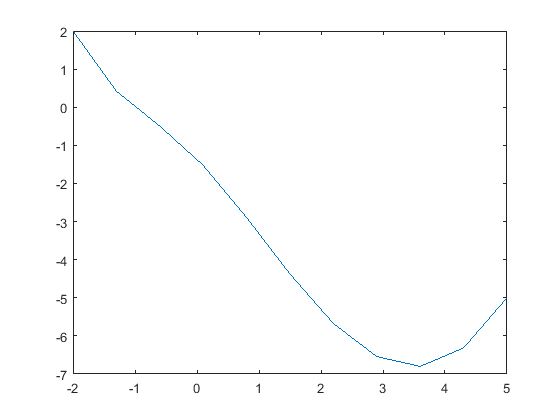

In [7]:
% EndelegDiffOrden2Rand.m

% Skript som løyser randverdiproblemet
% a(x) y'' + b(x) y' + c(x) y = d(x) med
% y(x_0)=y_0 og y(x_f)=y_f.
% Skriptet brukar endeleg differanse-formlar for
% numeriske deriverte til å sette opp problemet
% som ei matriselikning.
% Input:
%   1) Funksjonane a(x), b(x), c(x) og d(x)
%   2) Verdiane for x_0 og x_f
%   3) Randkrava; y(x_0) og y(x_f)
%   4) Talet på delintervall, N
% Til den siste variabelen brukar vi input-funksjonen.
% Dei andre er hardkoda.

% Inputvariablar
x0=-2;
y0=2;
xF=5;
yF=-5;
% Gir oppdelinga av x-intervallet
%N=input('Gi talet på delintervall: ');
N = 10

% Funksjonar
a=@(x) exp(x);
b=@(x) x;
c=@(x) -2*x.^0;
d=@(x) 2*exp(x)-x;

% Vektor med x-verdiar
h=(xF-x0)/N;
xVektor=(x0+h):h:(xF-h);

% Matriser og vektor for funksjonane;
Amat=diag(a(xVektor));
Bmat=diag(b(xVektor));
Cmat=diag(c(xVektor));
Dvektor=d(xVektor).';

% Matriser for dei deriverte
D1Mat=zeros(N-1,N-1);
D2Mat=zeros(N-1,N-1);
for ind=2:(N-2)
  D1Mat(ind,[ind-1 ind+1])=[-1 1]/(2*h);
  D2Mat(ind,(ind-1):(ind+1))=[1 -2 1]/h^2;
end
% Derivert i venstre ende
D1Mat(1,2)=1/(2*h);
% Derivert i høgre ende
D1Mat(N-1,N-2)=-1/(2*h);
% Dobbeltderivert i venstre ende
D2Mat(1,1:2)=[-2 1]/h^2;
% Dobbeltderivert i høgre ende
D2Mat(N-1,(N-2):(N-1))=[1 -2]/h^2;

% Set opp totalmatrisa
TotMat=[Amat*D2Mat+Bmat*D1Mat+Cmat, Dvektor];
% Legg til randkrava
TotMat(1,N)=TotMat(1,N)+y0*(-a(x0+h)/h^2+b(x0+h)/(2*h));
TotMat(N-1,N)=TotMat(N-1,N)-yF*(a(xF-h)/h^2+b(xF-h)/(2*h));

% Løyser likningssystemet
aux=rref(TotMat);
yVektor=aux(:,N).';
% Tar med randpunkta
yVektor=[y0, yVektor, yF]; xVektor=[x0, xVektor, xF];

% Plottar løysinga
plot(xVektor,yVektor)


N = 10

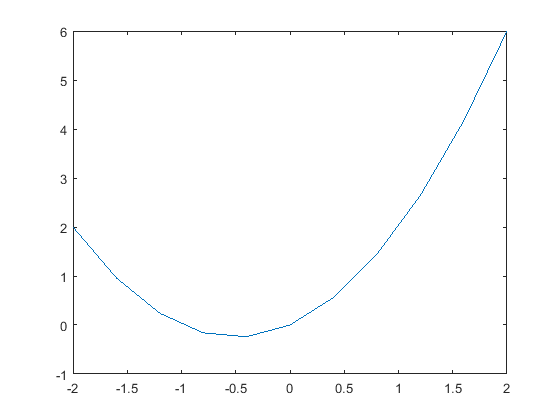

In [13]:
% EndelegDiffOrden2Start.m

% Skript som løyser startverdiproblemet
% a(x) y' + b(x) y = c(x), y(x_0)=y_0, y'(x_0)=yd.
% Skriptet brukar endeleg differanse-formlar for
% numeriske deriverte til å sette opp problemet
% som ei matriselikning.
% Input: 
%   1) Funksjonane a(x), b(x) og c(x)
%   2) Verdiane for x_0 og x_f, der x_f er maksimal x-verdi
%   3) Startkrava; y(x_0) og y'(x_0)
%   4) Talet på delintervall, N
% Til den siste variabelen brukar vi input-funksjonen. 
% Dei andre er hard-koda.

% Input-variable
x0=-2;
y0=2;
xF=2;
yD=-3;
% Gir oppdelinga av x-intervallet
%N=input('Gi talet på delintervall: ');  
N = 10

% Funksjonar
a=@(x) exp(x);
b=@(x) x;
c=@(x) -2*x.^0;
d=@(x) 2*exp(x)-x;

% Vektor med x-verdiar
h=(xF-x0)/N;
xVektor=(x0+h):h:(xF-h);

% Matriser og vektor for funksjonane;
Amat=diag(a(xVektor));
Bmat=diag(b(xVektor)); 
Cmat=diag(c(xVektor)); 
Cmat=[Cmat, zeros(N-1,1)];   % Utvidar Cmatrisa
Dvektor=d(xVektor).';

% Matriser for dei deriverte
% Brukar midpunktformelen for numerisk derivasjon
D1Mat=zeros(N-1,N);
D2Mat=zeros(N-1,N);
for ind=2:(N-2)
  D1Mat(ind,[ind-1 ind+1])=[-1 1]/(2*h);
  D2Mat(ind,(ind-1):(ind+1))=[1 -2 1]/h^2;
end
% Derivert i venstre ende
D1Mat(1,2)=1/(2*h);         
% Derivert i høgre ende
D1Mat(N-1,[N-2 N])=[-1 1]/(2*h);         
% Dobbelt-derivert i venstre ende
D2Mat(1,1:2)=[-2 1]/h^2;         
% Dobbelt-derivert i høgre ende
D2Mat(N-1,(N-2):N)=[1 -2 1]/h^2;    

% Set opp totalmatrisa
TotMat=[Amat*D2Mat+Bmat*D1Mat+Cmat, Dvektor];  
% Legg til startkravet på y(x_0)
TotMat(1,N+1)=TotMat(1,N+1)+y0*(-a(x0+h)/h^2+b(x0+h)/(2*h));
% Legg til startkravet på y'(x_0)
TotMat(N,:)=zeros(1,N+1);
TotMat(N,[1 2])=[4 -1]/(2*h);
TotMat(N,N+1)=yD+3/(2*h)*y0;

% Løyser likningssystemet
aux=rref(TotMat);           
yVektor=aux(:,N+1).';       
% Tar med utgangspunktet
yVektor=[y0, yVektor]; xVektor=[x0, xVektor, xF];

% Plottar løysinga
plot(xVektor,yVektor)
